In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
train = pd.read_csv(r'C:\Users\asus\Downloads\train.csv\train.csv')
test = pd.read_csv(r'C:\Users\asus\Downloads\test.csv\test.csv')

In [251]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [252]:
train.shape

(550068, 12)

# #Check descriptive statistics of the dataset

In [253]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Check for missing values in the data

In [254]:
train.isnull().sum() # There are so many missing values in product_category_2 and product_category_3
#and null values are present more than 30% so we can remove the column.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# •	check for unique values in the data

In [255]:
unique_values = train.nunique()
unique_values.sum() # There are 27719 unique values in this data 

27719

In [256]:
 train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# •Perform EDA

In [213]:
#train = train.drop_duplicates()  # remove duplicates
#train = train.dropna()  # remove missing values

In [214]:
#train.describe()

In [257]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [258]:
corr=train.corr() # checking correlation between two variable.
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


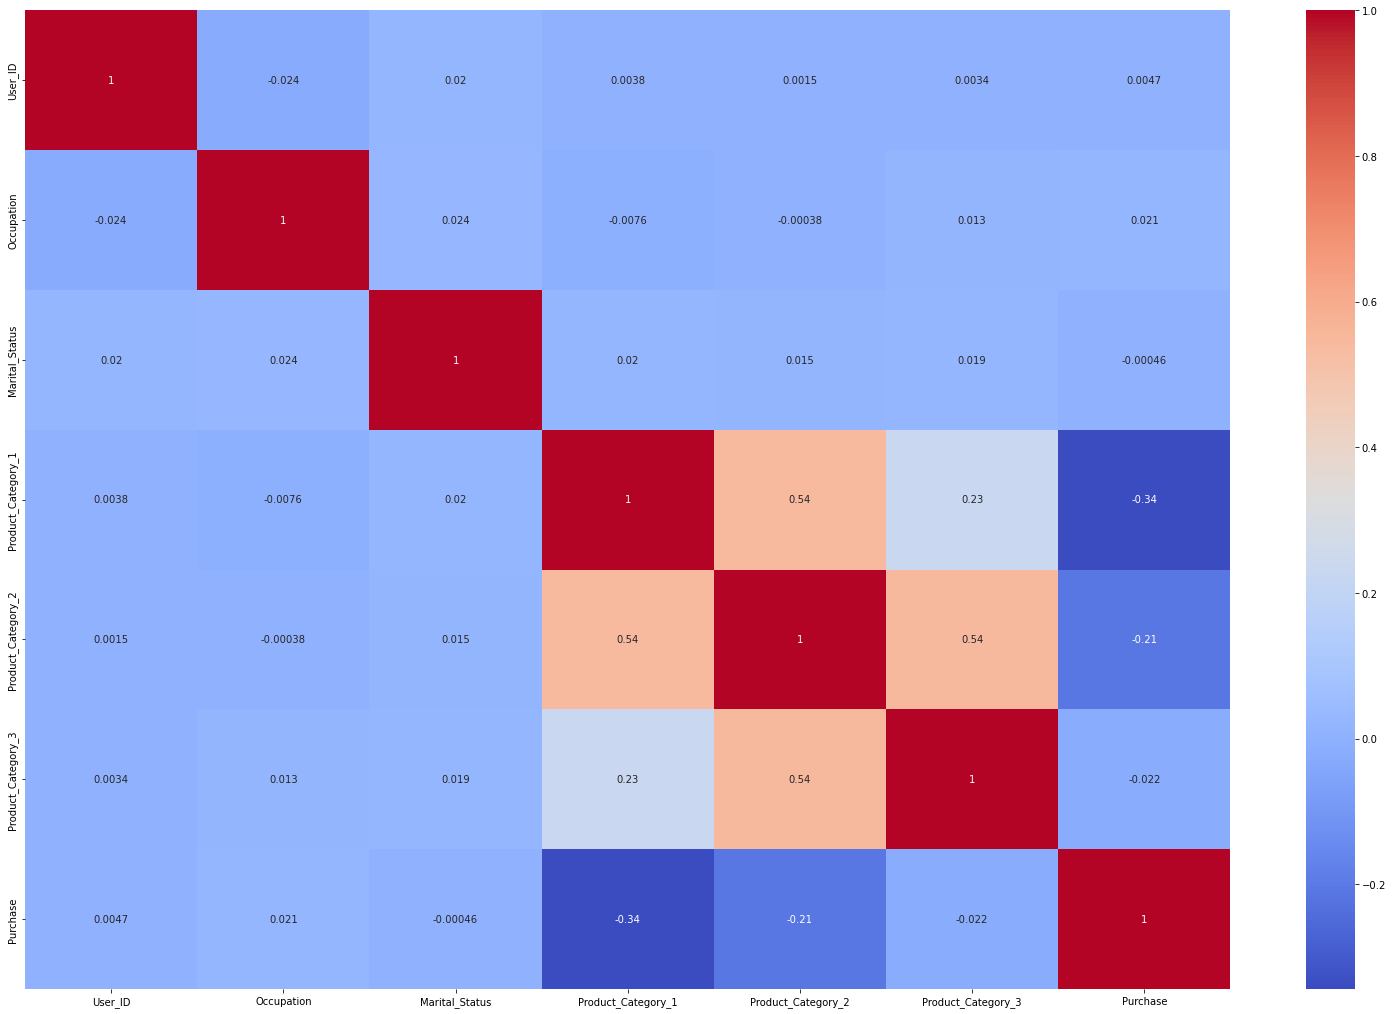

In [259]:
plt.figure(figsize=(27,18))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()
#by using correation we found that the correation between product_category_1 and product_category_2 is moderate relation.
# also we found that the correation between product_category_2 and product_category_3 is moderate relation

In [218]:
#exp_correction={'4+':4} 
#train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace(exp_correction)

In [260]:
train['Stay_In_Current_City_Years']=(train['Stay_In_Current_City_Years'].str.strip('+').astype('float'))
##As you can see, we were successful in cleaning the columns to our specifications and eliminating the "+" sign from the columns.

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  float64
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 42.0+ MB


In [286]:
train.corr() 

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,0.037158,0.117291,0.014660,-0.011603,-0.045594,-0.015300,0.014978,0.060346
Age,0.037158,1.000000,-0.035127,0.027215,-0.082919,-0.027491,-0.006840,-0.002923,-0.000126
Occupation,0.117291,-0.035127,1.000000,0.030005,0.024280,-0.007618,-0.000317,0.007265,0.020833
Stay_In_Current_City_Years,0.014660,0.027215,0.030005,1.000000,-0.012819,-0.004213,-0.001368,0.001148,0.005422
Marital_Status,-0.011603,-0.082919,0.024280,-0.012819,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,-0.045594,-0.027491,-0.007618,-0.004213,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,-0.015300,-0.006840,-0.000317,-0.001368,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.014978,-0.002923,0.007265,0.001148,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.060346,-0.000126,0.020833,0.005422,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


In [261]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4.0,0,8,NaN,NaN,7969


# •	Purchase Distribution with respect to other variables in the dataset.

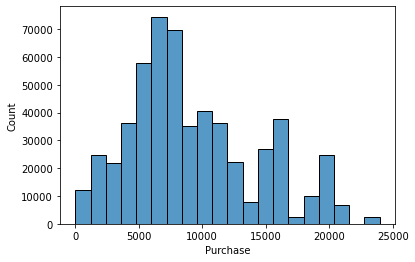

In [262]:
sns.histplot(data=train, x='Purchase', bins=20)
plt.show()

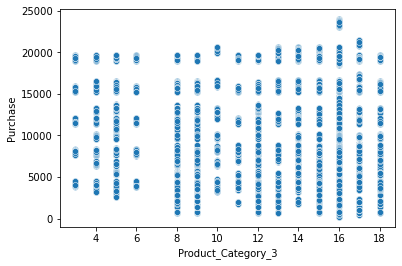

In [263]:
sns.scatterplot(data=train, x='Product_Category_3', y='Purchase')
plt.show()

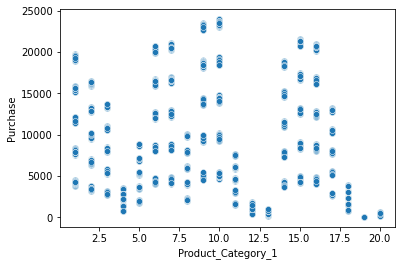

In [264]:
sns.scatterplot(data=train, x='Product_Category_1', y='Purchase')
plt.show()

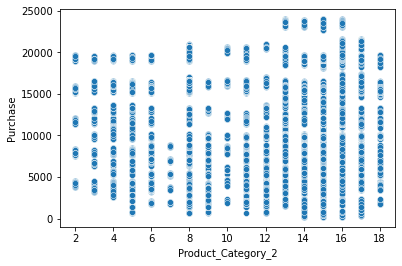

In [265]:
sns.scatterplot(data=train, x='Product_Category_2', y='Purchase')
plt.show()

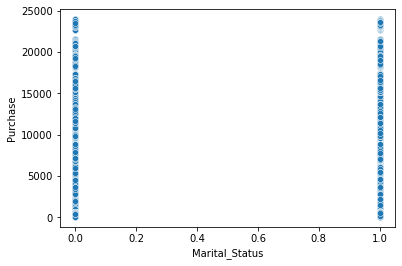

In [266]:
sns.scatterplot(data=train, x='Marital_Status', y='Purchase')
plt.show()

<AxesSubplot:>

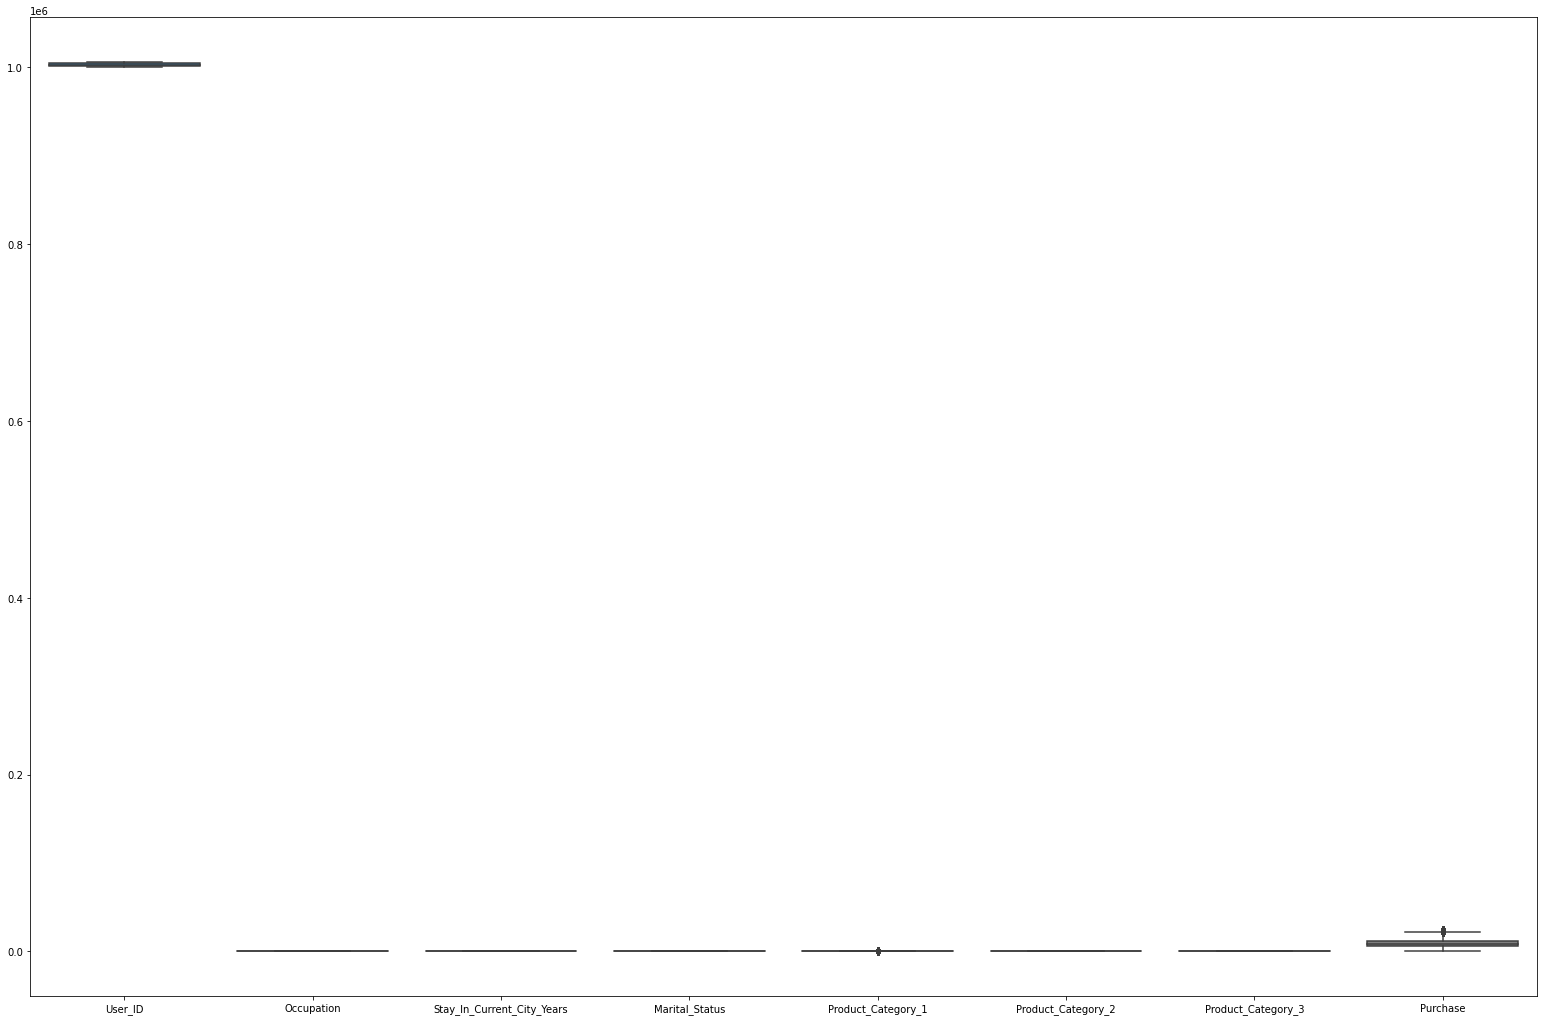

In [267]:
# create box plots for each numerical variable
plt.figure(figsize=(27,18))
sns.boxplot(data=train)

# •Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

               mean  median          std
Gender                                  
F       8734.565765  7914.0  4767.233289
M       9437.526040  8098.0  5092.186210


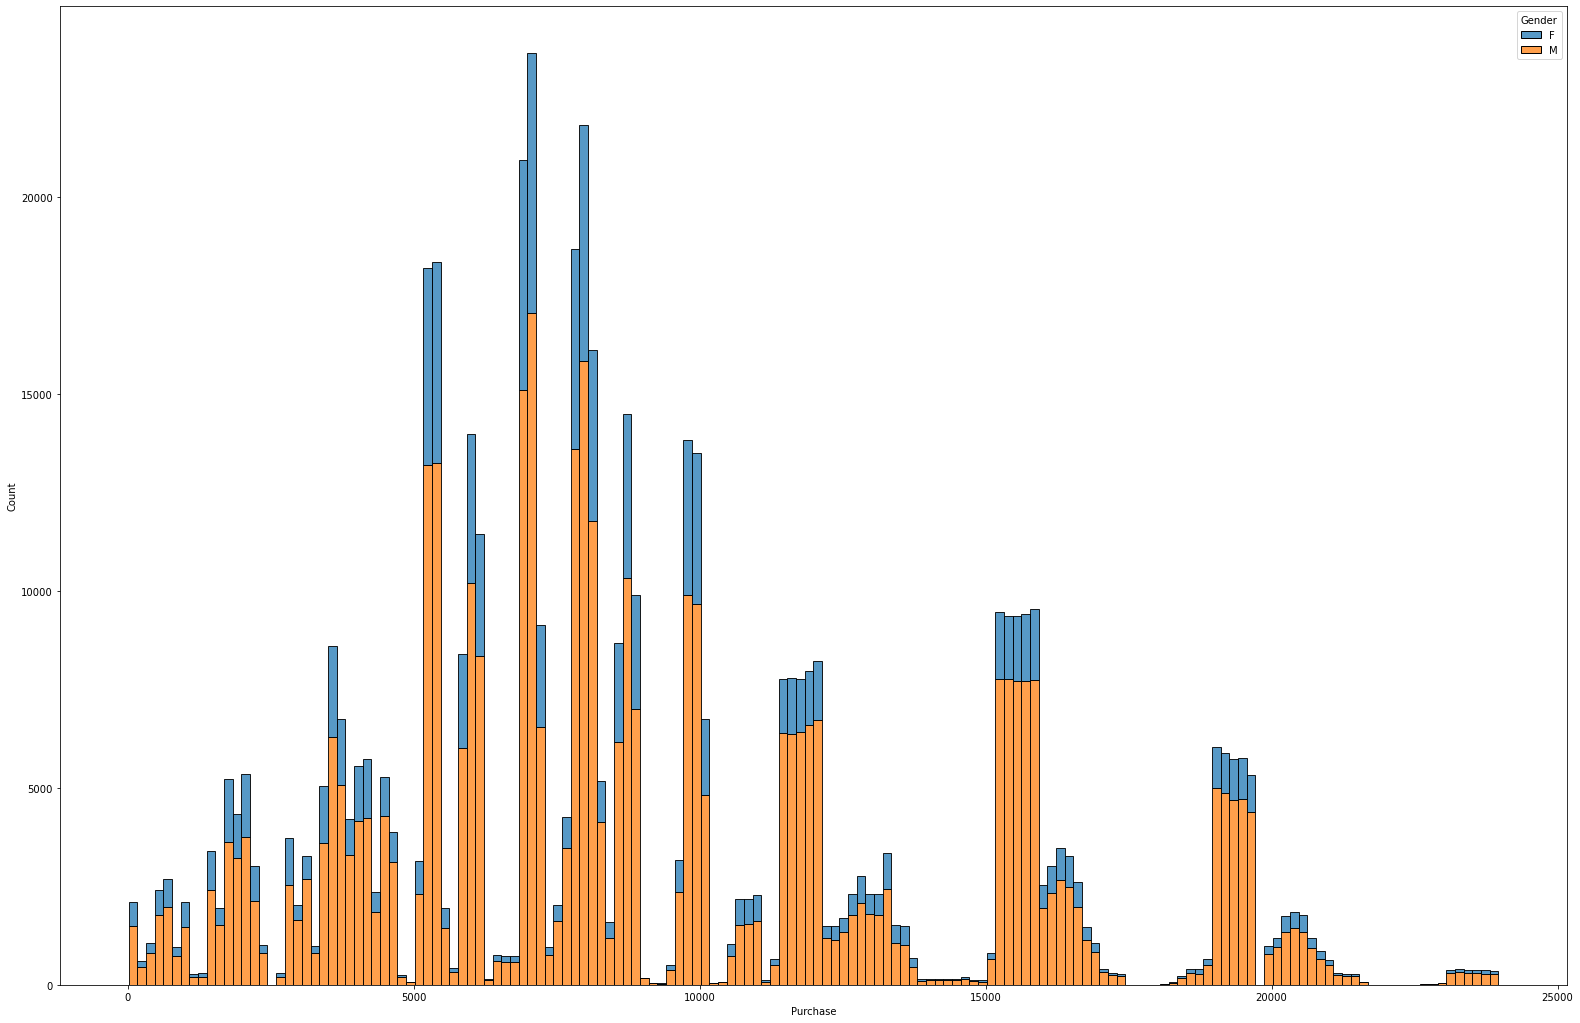

In [268]:
# compute descriptive statistics by gender
plt.figure(figsize=(27,18))
stats_by_gender =train.groupby('Gender')['Purchase'].agg(['mean', 'median', 'std'])

print(stats_by_gender)

# create histograms of purchase amounts by gender
sns.histplot(data=train, x='Purchase', hue='Gender', multiple='stack')
plt.show()

                       mean  median          std
Marital_Status                                  
0               9265.907619  8044.0  5027.347859
1               9261.174574  8051.0  5016.897378


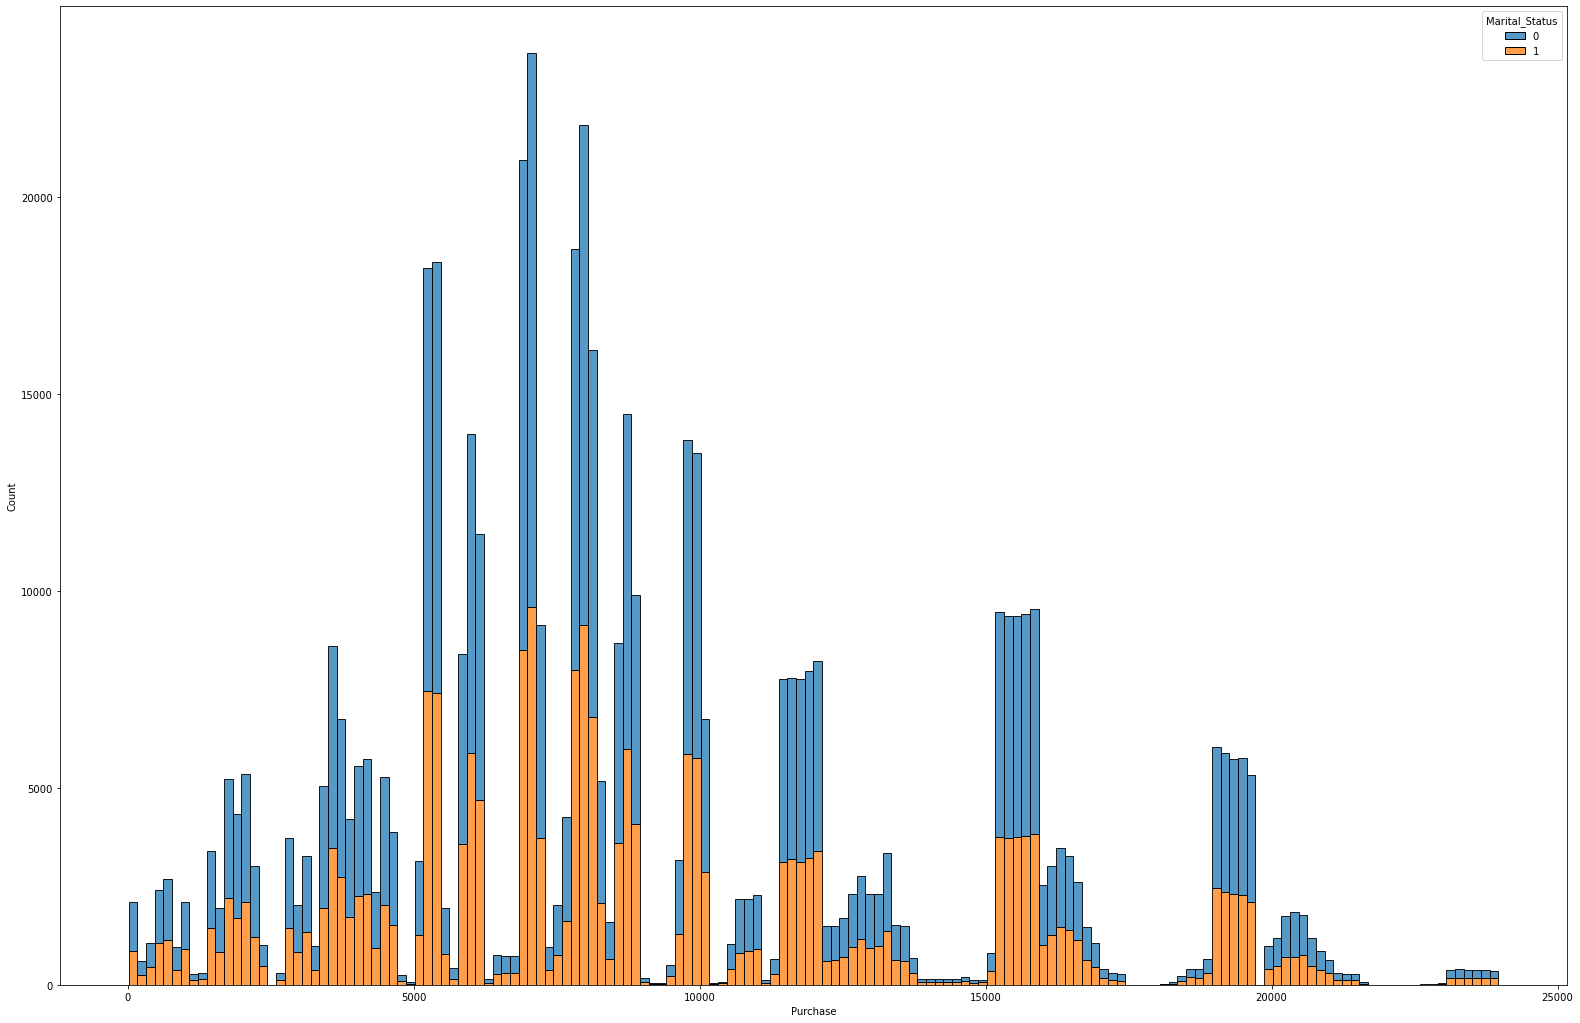

In [269]:
# compute descriptive statistics by marital status
plt.figure(figsize=(27,18))
stats_by_marital_status = train.groupby('Marital_Status')['Purchase'].agg(['mean', 'median', 'std'])

print(stats_by_marital_status)

# create histograms of purchase amounts by marital status
sns.histplot(data=train, x='Purchase', hue='Marital_Status', multiple='stack')
plt.show()

                   mean  median          std
Occupation                                  
0           9124.428588  8001.0  4971.757402
1           8953.193270  7966.0  4838.482159
2           8952.481683  7952.0  4939.418663
3           9178.593088  8008.0  5000.942719
4           9213.980251  8043.0  5043.674855
5           9333.149298  8080.0  5025.616603
6           9256.535691  8050.0  4989.216005
7           9425.728223  8069.0  5086.097089
8           9532.592497  8419.5  4916.641374
9           8637.743761  7886.0  4653.290986
10          8959.355375  8012.5  5124.339999
11          9213.845848  8041.5  5103.802992
12          9796.640239  8569.0  5140.437446
13          9306.351061  8090.5  4940.156591
14          9500.702772  8122.0  5069.600234
15          9778.891163  8513.0  5088.424301
16          9394.464349  8070.0  4995.918117
17          9821.478236  8635.0  5137.024383
18          9169.655844  7955.0  4987.697451
19          8710.627231  7840.0  5024.181000
20        

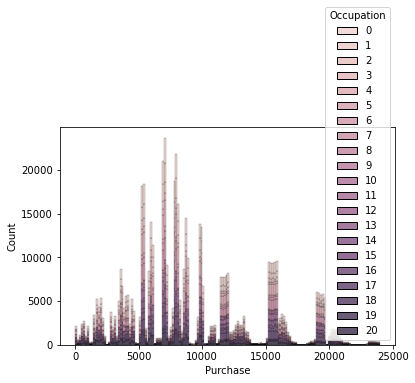

In [270]:
# compute descriptive statistics by occupation
stats_by_occupation = train.groupby('Occupation')['Purchase'].agg(['mean', 'median', 'std'])

print(stats_by_occupation)

# create histograms of purchase amounts by occupation
sns.histplot(data=train, x='Purchase', hue='Occupation', multiple='stack')
plt.show()

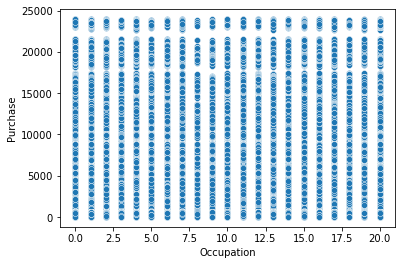

In [271]:
# create a scatter plot of occupation vs purchase amount
sns.scatterplot(data=train, x='Occupation', y='Purchase')
plt.show()

                      mean  median          std
City_Category                                  
A              8911.939216  7931.0  4892.115238
B              9151.300563  8005.0  4955.496566
C              9719.920993  8585.0  5189.465121


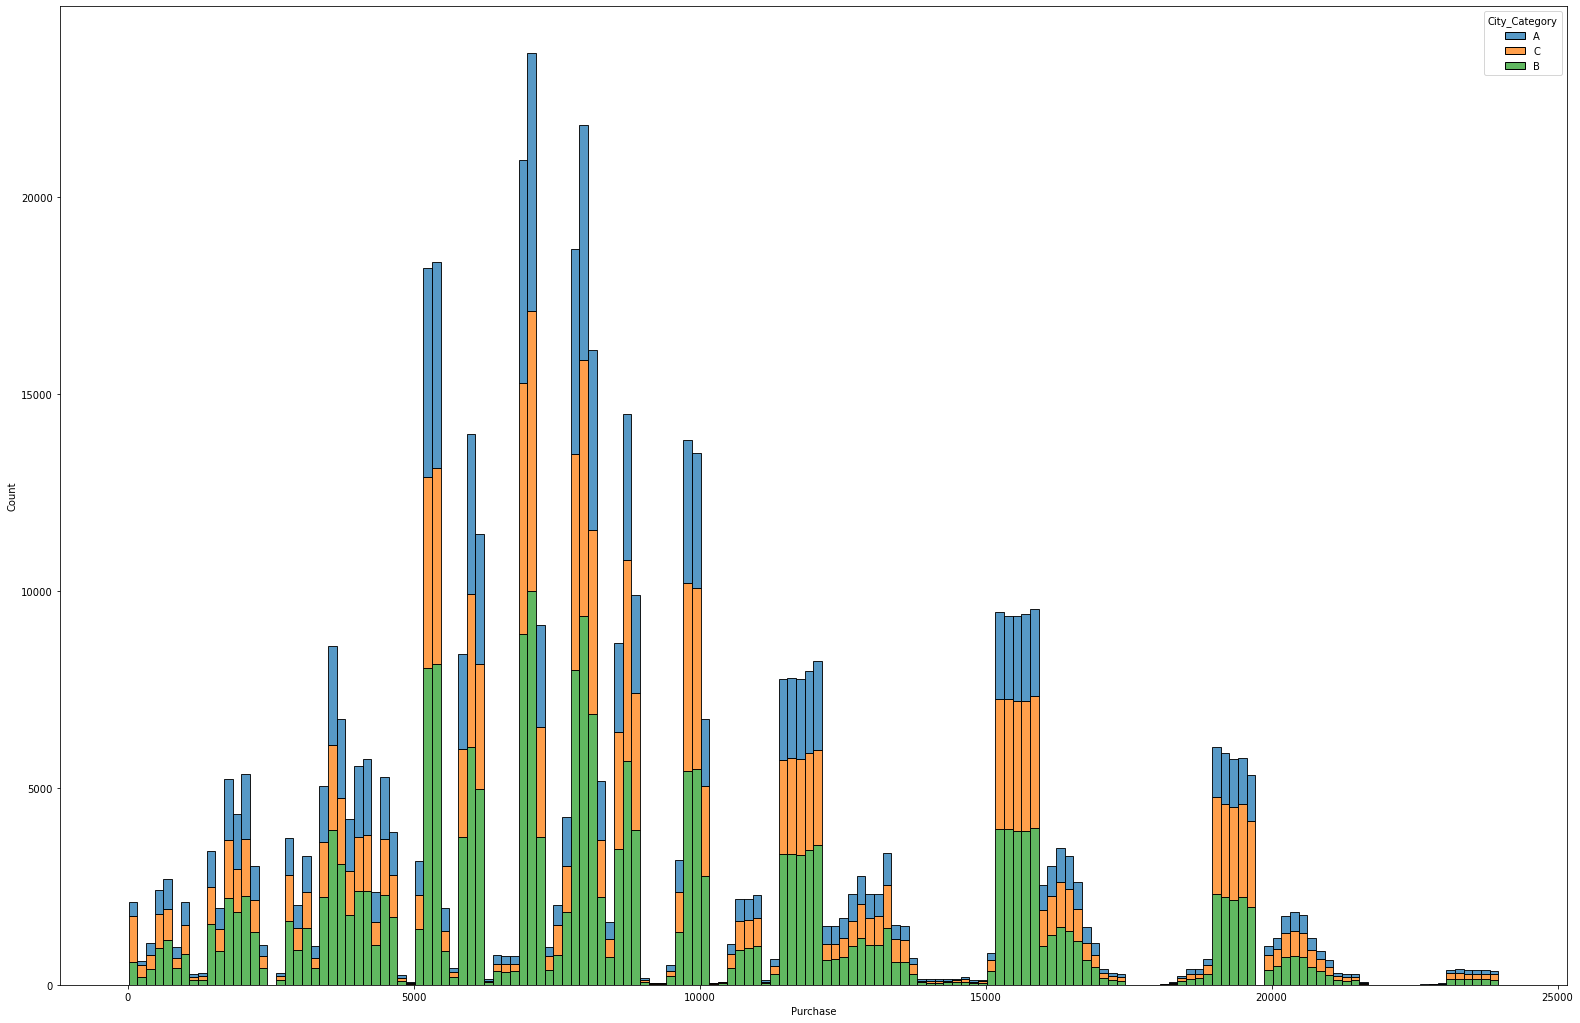

In [272]:
# compute descriptive statistics by city
plt.figure(figsize=(27,18))
stats_by_city = train.groupby('City_Category')['Purchase'].agg(['mean', 'median', 'std'])

print(stats_by_city)

# create histograms of purchase amounts by city
sns.histplot(data=train, x='Purchase', hue='City_Category', multiple='stack')
plt.show()

In [273]:
# compute descriptive statistics by age group
stats_by_age_group = train.groupby('Age')['Purchase'].agg(['mean', 'median', 'std'])


# •Drop unnecessary fields

In [274]:
train = train.drop(['User_ID', 'Product_ID'], axis=1)


In [275]:
train.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,F,0-17,10,A,2.0,0,1,6.0,14.0,15200


# •Convert categorical data into integer using map function (e.g 'Gender' column)

In [276]:
Gender = {'F': 1, 'M': 2}
train['Gender'] = train['Gender'].map(Gender)

In [277]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,1,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1,0-17,10,A,2.0,0,12,NaN,NaN,1422
3,1,0-17,10,A,2.0,0,12,14.0,NaN,1057
4,2,55+,16,C,4.0,0,8,NaN,NaN,7969


# •missing value treatment

In [278]:
# Drop rows with missing values
#train = df.dropna()

# Drop columns with missing values
#train = df.dropna(axis=1)

# fill nan values

In [279]:
#Replace missing values with the mean
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(), inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mean(), inplace=True)


#Replace missing values with the median
#train.fillna(df.median(), inplace=True)

# Replace missing values with the mode
#train.fillna(df.mode(), inplace=True)

# •Rename columns

In [280]:
# rename the columns
#train = train.rename(columns={'Gender': 'Gender_male_female', 'Age': 'Age group'})

# •	map range variables into integers (e.g 'Age' column)

In [281]:
Age = {'0-17': 1, '55+': 2, '26-35': 7, '46-50': 4, '51-55': 3, '36-45': 6, '18-25': 5}
train['Age'] = train['Age'].map(Age)

In [282]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1,10,A,2.0,0,3,9.842329,12.668243,8370
1,1,1,10,A,2.0,0,1,6.000000,14.000000,15200
2,1,1,10,A,2.0,0,12,9.842329,12.668243,1422
3,1,1,10,A,2.0,0,12,14.000000,12.668243,1057
4,2,2,16,C,4.0,0,8,9.842329,12.668243,7969


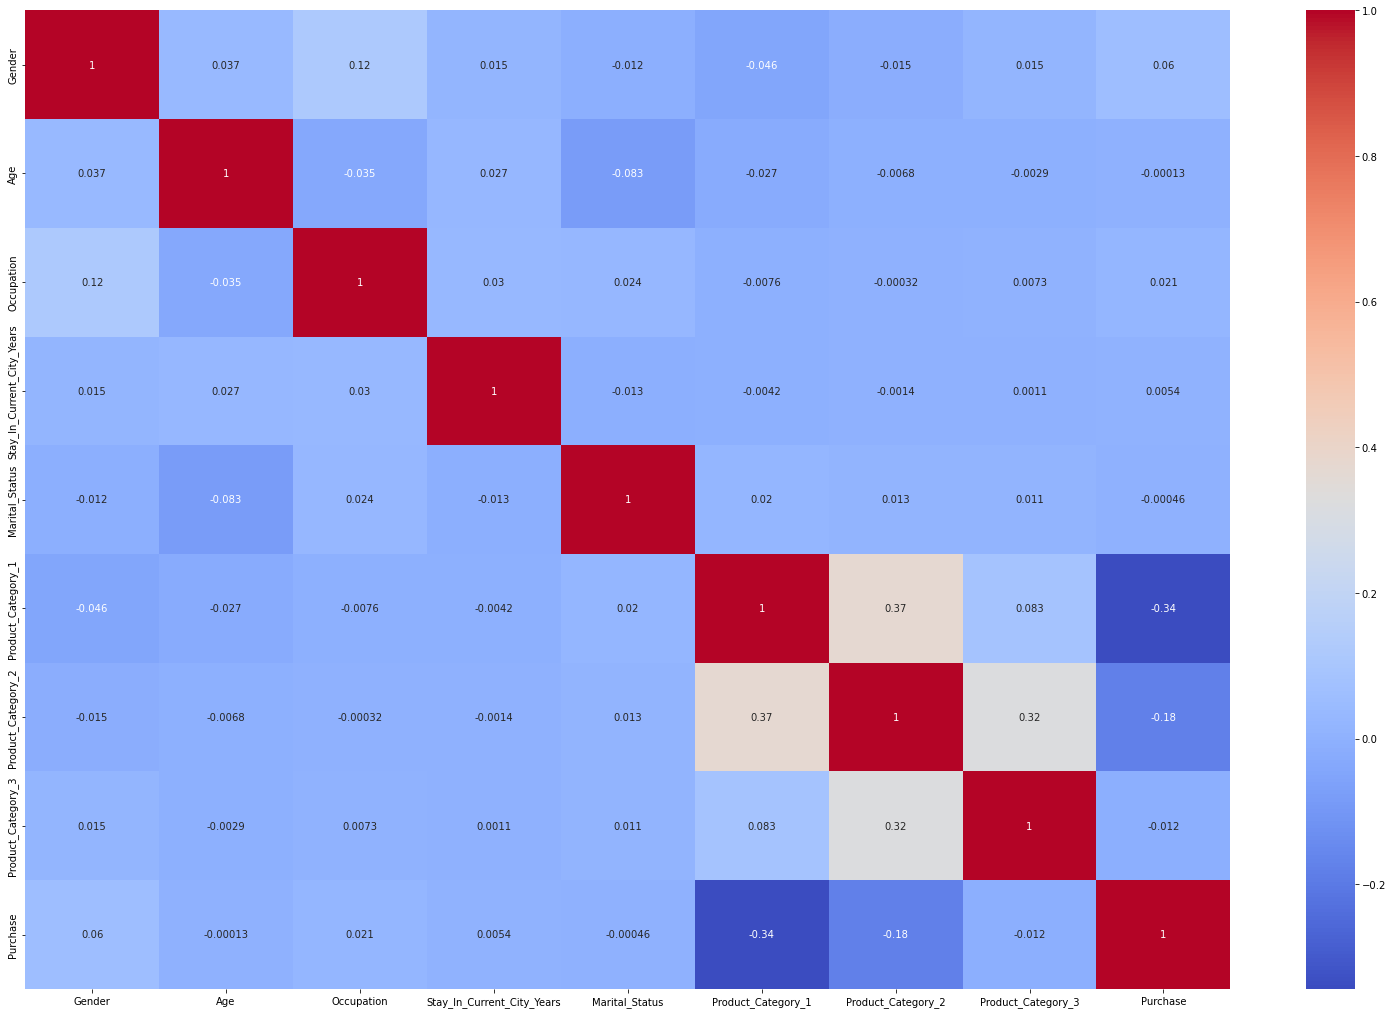

In [287]:
plt.figure(figsize=(27,18))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
#The positive correlation coefficients of two features as a function of Purchasing are the main conclusions to be drawn from the present plot.
#Occupation
#Stay_In_Current_City_Years
#The chance of a consumer making a larger purchase increases with each increase in value for the two attributes mentioned above.

# Data Visualization

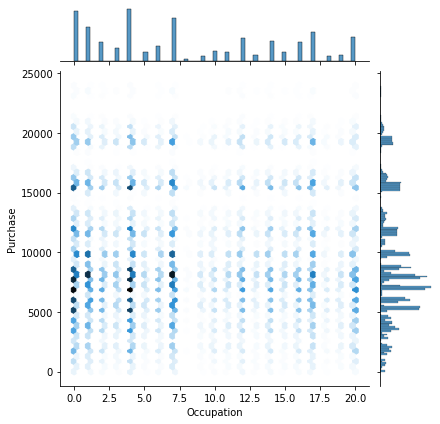

In [288]:
sns.jointplot(x='Occupation',y='Purchase',
              data=train, kind='hex'
             )
#The most important finding is that most purchases are made between 5,000 and 10,000.

C:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


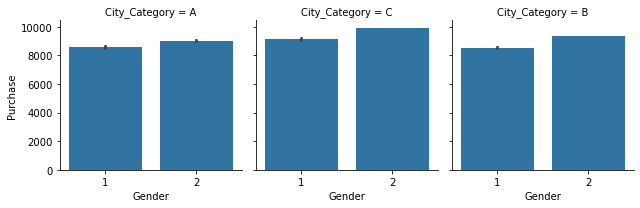

In [289]:
g = sns.FacetGrid(train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

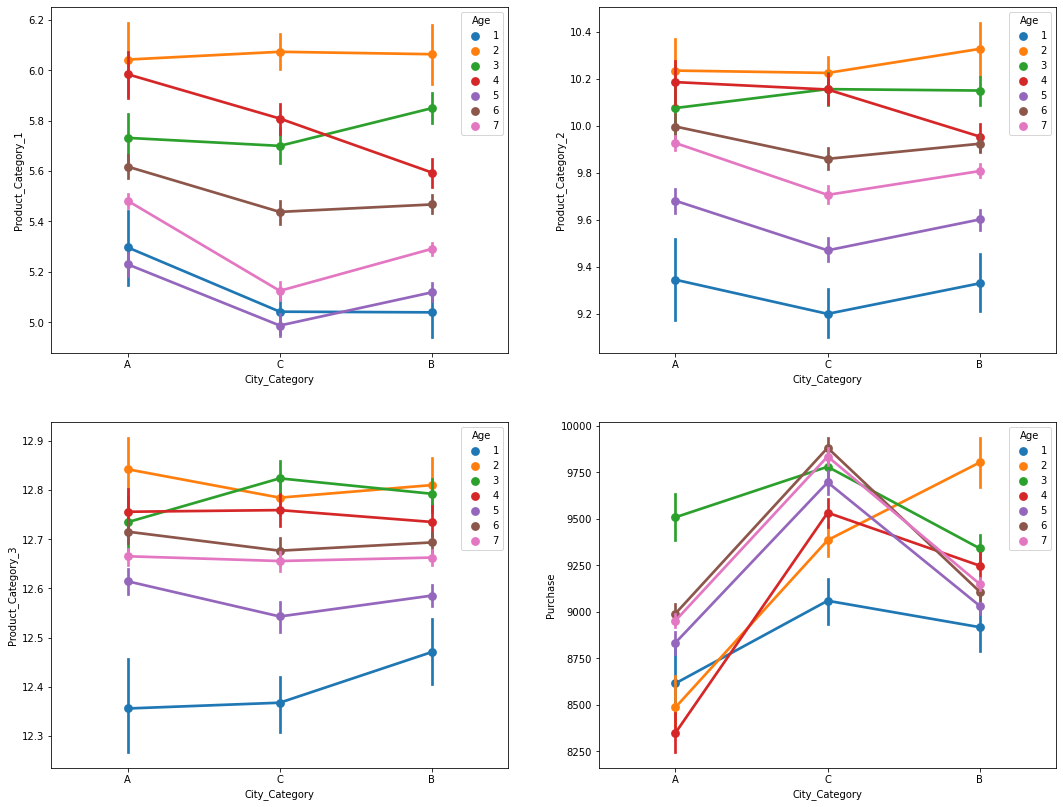

In [290]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=train,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=train,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=train,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=train,
                 ax=axes[1,1]
                )

<AxesSubplot:title={'center':'age vs purchase'}, xlabel='Age', ylabel='Purchase'>

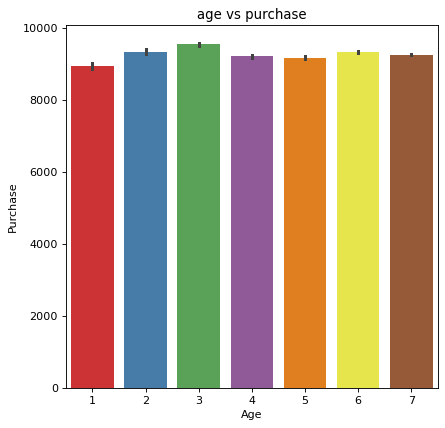

In [310]:
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=train,palette='Set1')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

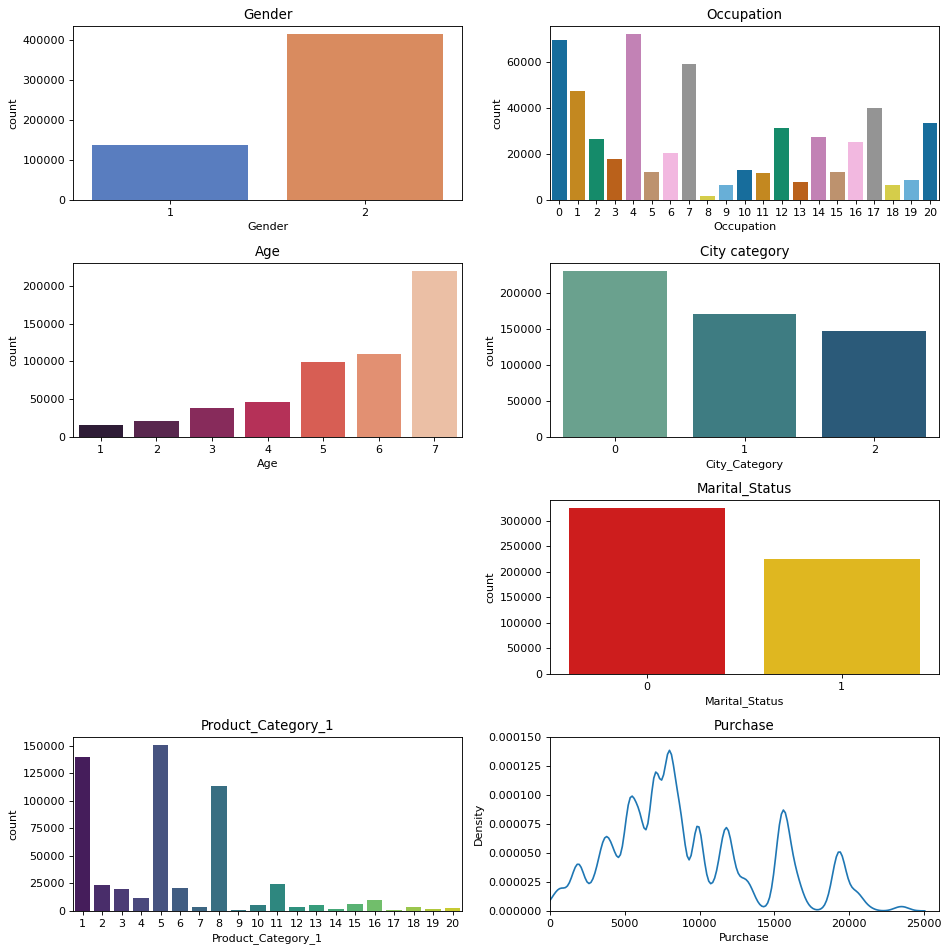

In [318]:
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=train,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=train,palette='rocket')



plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(train['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(train['City_Category'],palette='crest')

plt.subplot(4,2,6)
plt.title('Marital_Status')
sns.countplot(train['Marital_Status'],palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(train['Purchase'])

plt.subplot(4,2,7)
plt.title('Product_Category_1')
sns.countplot(train['Product_Category_1'],palette='viridis')

plt.tight_layout()
plt.show()

In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  float64
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 42.0+ MB


In [298]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [299]:
City_Category= {'B': 0, 'C': 1,'A':2}
train['City_Category'] = train['City_Category'].map(City_Category)

In [300]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  float64
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 42.0 MB


Text(0.5, 1.0, 'Product_Category_2 vs Purchase')

<Figure size 432x288 with 0 Axes>

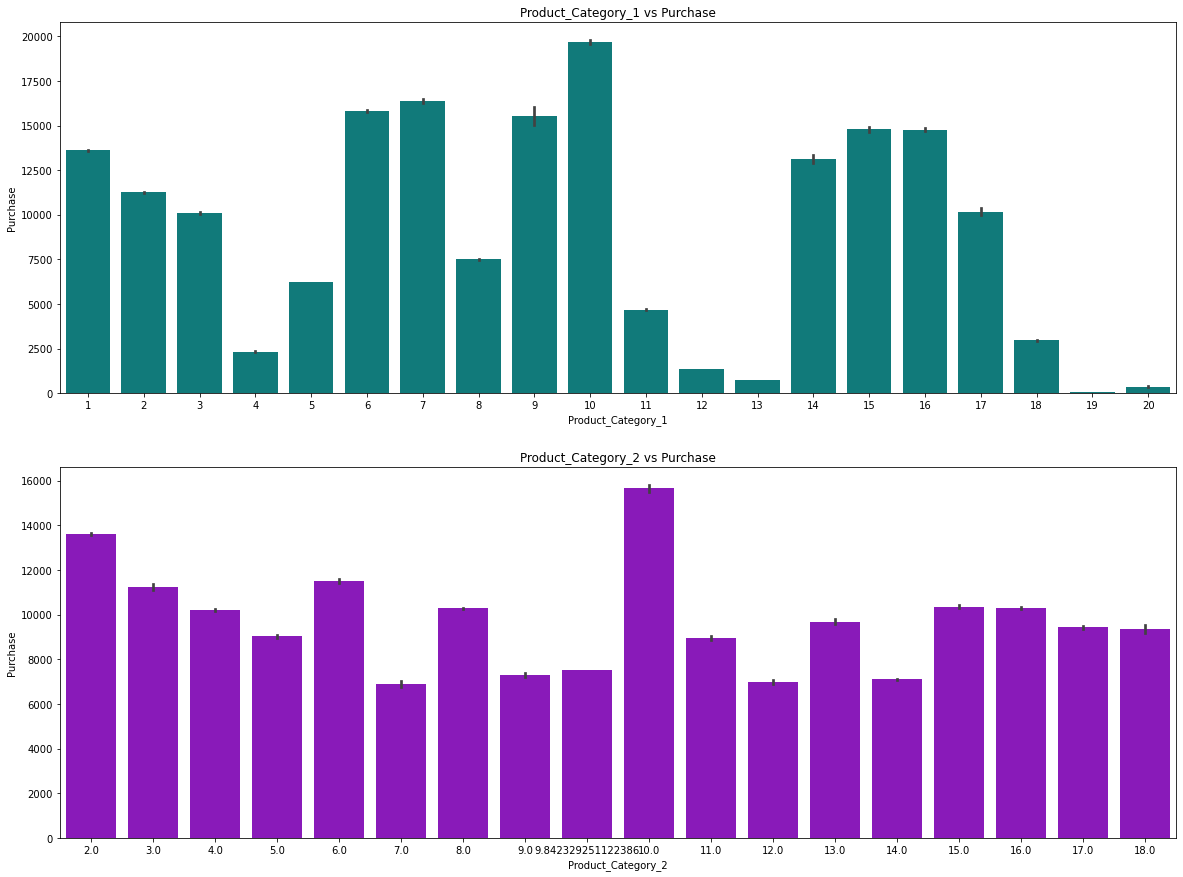

In [328]:
plt.figure(1)
plt.figure(figsize = (20, 15))

# Column (Product_Category_1 vs Purchase)
plt.subplot(211)
sns.barplot(x = train['Product_Category_1'], y = train['Purchase'], color = "darkcyan")
plt.title('Product_Category_1 vs Purchase')

# Column (Product_Category_2 vs Purchase)
plt.subplot(212)
sns.barplot(x = train['Product_Category_2'], y = train['Purchase'], color = "darkviolet")
plt.title('Product_Category_2 vs Purchase')



Text(0.5, 1.0, 'Product_Category_3 vs Purchase')

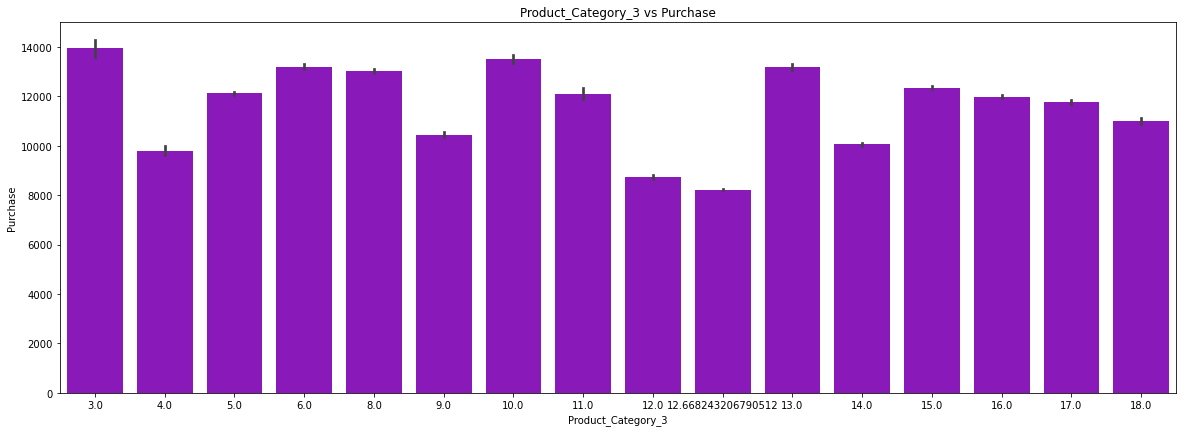

In [330]:
# Column (Product_Category_3 vs Purchase)
plt.figure(figsize = (20, 15))
plt.subplot(212)
sns.barplot(x = train['Product_Category_3'], y = train['Purchase'], color = "darkviolet")
plt.title('Product_Category_3 vs Purchase')

<AxesSubplot:title={'center':'maritial status vs purchase'}, xlabel='Marital_Status', ylabel='Purchase'>

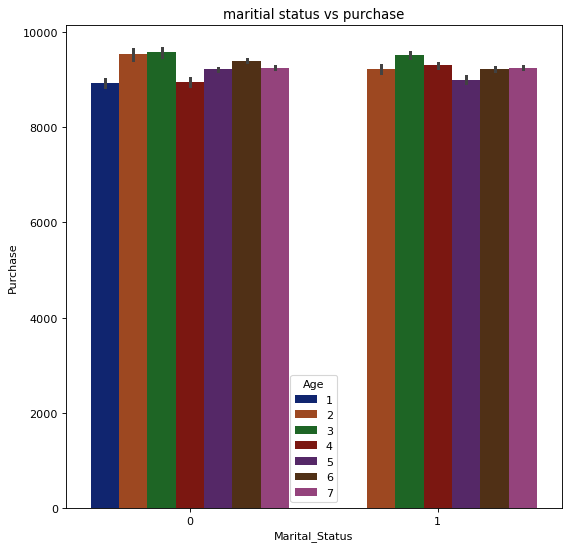

In [351]:
# Plotting purchase vs product1
plt.figure(figsize=(8,8),dpi=80)
plt.title('maritial status vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',data=train,palette='dark',hue='Age')

# Q-2 The company is looking to build a model that can predict how much a customer is likely to spend on a given product, which will enable them to tailor personalized offers to each customer for different products

# Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [301]:
x=train.drop('Purchase',axis=1)
y=train.Purchase
print(x.shape)
print(y.shape)

(550068, 9)
(550068,)


In [302]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [303]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Linear Regression

In [304]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [306]:
predictions = lm.predict(x_test)
print("Predicted purchase:", predictions)

Predicted purchase: [ 8259.00101358  9450.90140952  8911.58484133 ...  8319.91989294
 10144.3166433  10311.42660981]


In [307]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3578.933815832789
MSE: 21840875.710571587


In [309]:
lm.score(x_train,y_train)

0.12270112992179028

# RandomForestRegressor

In [319]:
from sklearn.ensemble import RandomForestRegressor

In [322]:
rf = RandomForestRegressor(max_depth=9)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=9)

In [340]:
pred=rf.predict(x_test)
pred

array([ 7399.5165733 ,  5955.7981371 ,  6042.17241395, ...,
        7440.07901698, 13139.49596384, 10059.07410122])

In [352]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

MAE: 2213.8384385984864
MSE: 8644348.694905264


In [341]:
rf.score(x_train,y_train)

0.6580001901184209

# XGBRegressor

In [331]:
from xgboost import XGBRegressor

In [342]:
xgb = XGBRegressor(max_depth=7, max_leaves=5)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=5, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [347]:
xg_pred = xgb.predict(x_test)
xg_pred

array([ 7921.446 ,  5020.4937,  6340.0737, ...,  7500.188 , 13438.629 ,
        9195.694 ], dtype=float32)

In [353]:
print('MAE:', metrics.mean_absolute_error(y_test, xg_pred))
print('MSE:', metrics.mean_squared_error(y_test, xg_pred))

MAE: 2125.6455551114054
MSE: 8122673.860566152


In [348]:
xgb.score(x_train,y_train)

0.69026066782286

# DecisionTree Regressor

In [335]:
from sklearn.tree import DecisionTreeRegressor

In [337]:
dt = DecisionTreeRegressor(max_depth=9, max_features=8)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, max_features=8)

In [344]:
dt_pred = dt.predict(x_test)
dt_pred

array([ 7394.66627724,  6016.21946109,  6015.82430051, ...,
        7394.66627724, 13249.88755894, 10282.1       ])

In [354]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))

MAE: 2226.3386753905966
MSE: 8761294.336292155


In [345]:
dt.score(x_train,y_train)

0.6537094225036135

In [ ]:
MAE=MEAN ABSOLUTE ERROR =(ACUTAL VALUE-PREDICTED VALUE)
MSE=MEAN SQUARED ERROR =(ACUTAL VALUE-PREDICTED VALUE)**2

In [ ]:
===============================================================================================================================